# Demo - Dissimilarity Based Selection Synthetic Data

In [1]:
import DiverseSelector
from DiverseSelector.feature import compute_features
from DiverseSelector.test.common import generate_synthetic_data
import matplotlib.pyplot as plt
import numpy as np

## Generating Synthetic Data

In [2]:
coords, class_labels, arr_dist = generate_synthetic_data(n_samples=100,
                                                         n_features=2,
                                                         n_clusters=1,
                                                         pairwise_dist=True,
                                                         metric="euclidean",
                                                         random_state=42)

coords_cluster, class_labels_cluster, arr_dist_cluster = generate_synthetic_data(n_samples=100,
                                                         n_features=2,
                                                         n_clusters=3,
                                                         pairwise_dist=True,
                                                         metric="euclidean",
                                                         random_state=42)
def graph_data(coords, selected=None, reference=False):
    plt.figure(dpi=150)
    plt.scatter(coords[:, 0], coords[:, 1])
    if selected:
        for i, mol_id in enumerate(selected):
            plt.scatter(coords[mol_id, 0], coords[mol_id, 1], c='r')
            plt.text(coords[mol_id,0], coords[mol_id,1], str(i+1))
    if reference:
        plt.scatter(coords[0, 0], coords[0, 1], c='black')
    plt.show()

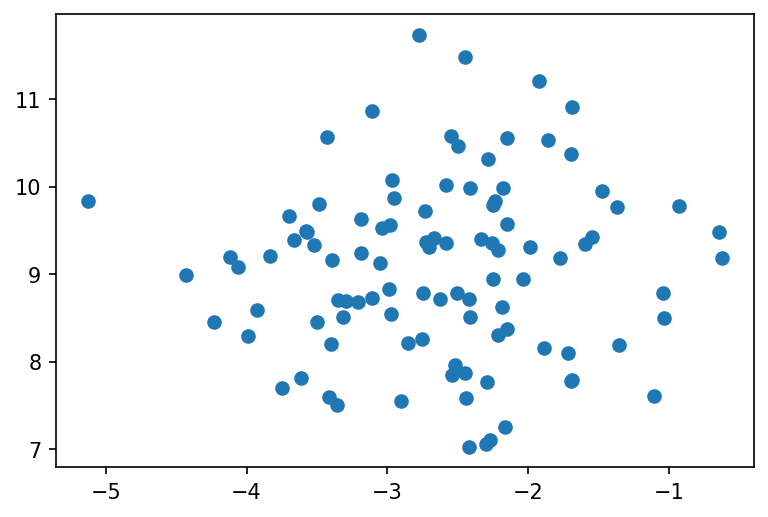

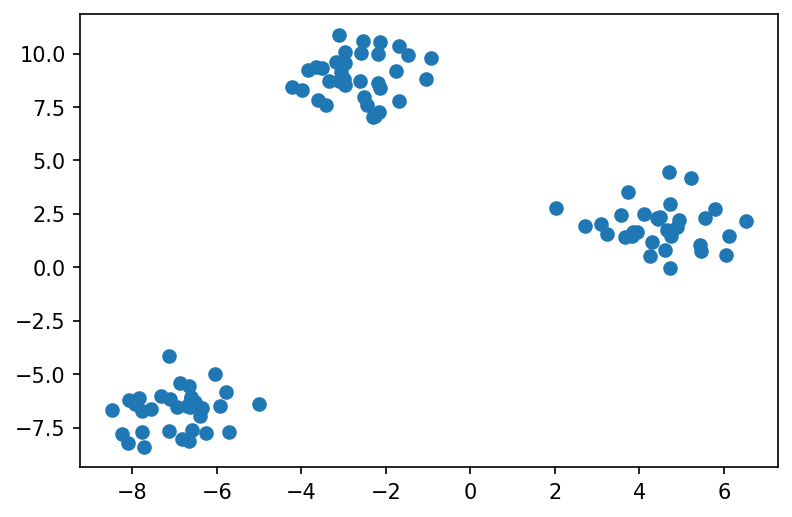

In [3]:
graph_data(coords)
graph_data(coords_cluster)

## Running Dissimilarity Algorithms

### Brute Strength - maxmin

In [7]:
from DiverseSelector.selectors import MaxMin, OptiSim, DirectedSphereExclusion,\
    GridPartitioning
selector = MaxMin()
selected_ids1 = selector.select(arr=arr_dist, num_selected=8)

selector = MaxMin()
selected_ids2 = selector.select(arr=arr_dist_cluster, labels=class_labels_cluster, num_selected=15)

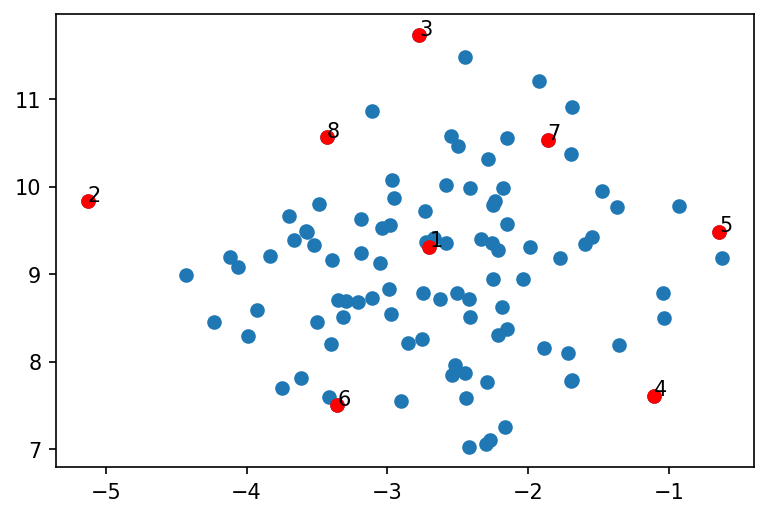

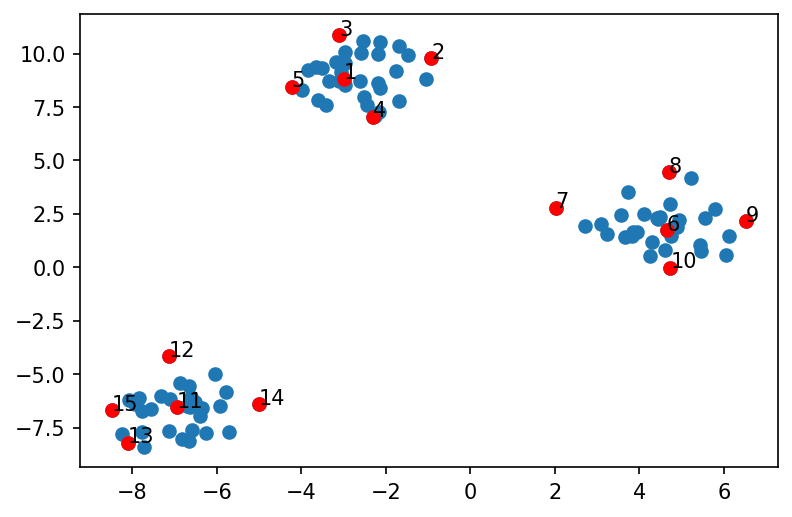

In [8]:
graph_data(coords,selected_ids1)
graph_data(coords_cluster,selected_ids2)

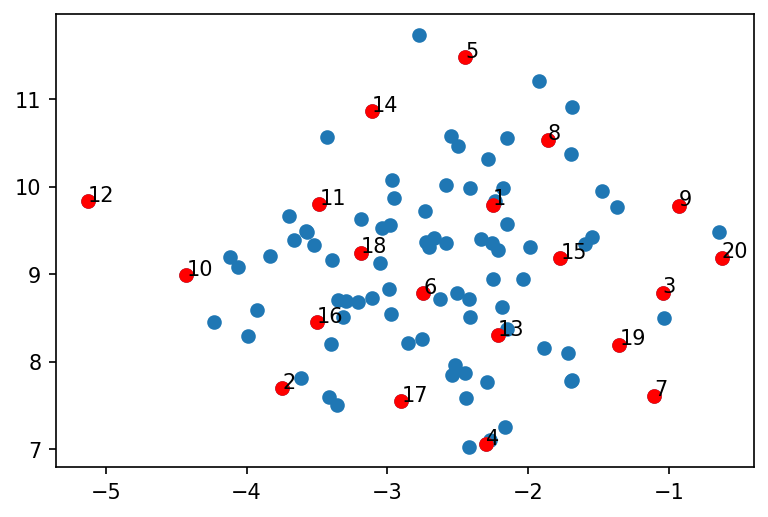

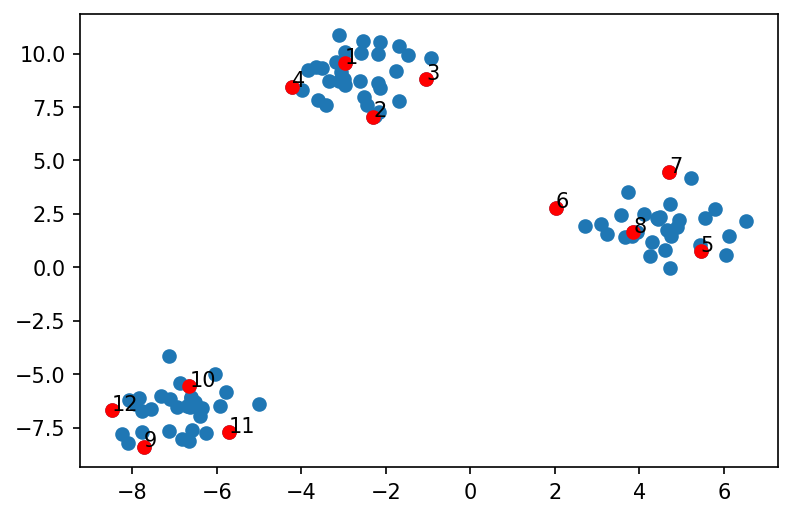

In [6]:
selected_id3 = OptiSim().select(coords, 20)
selected_id4 = OptiSim().select(coords_cluster, num_selected=12, labels=class_labels_cluster)
graph_data(coords,selected_id3)
graph_data(coords_cluster,selected_id4)

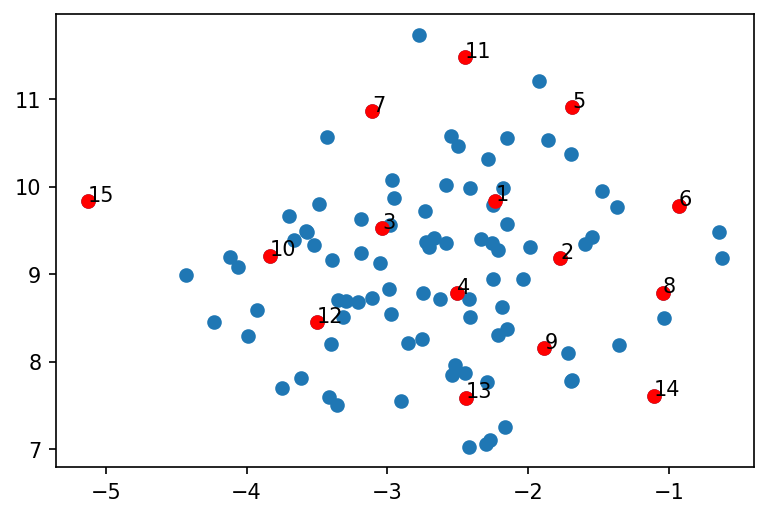

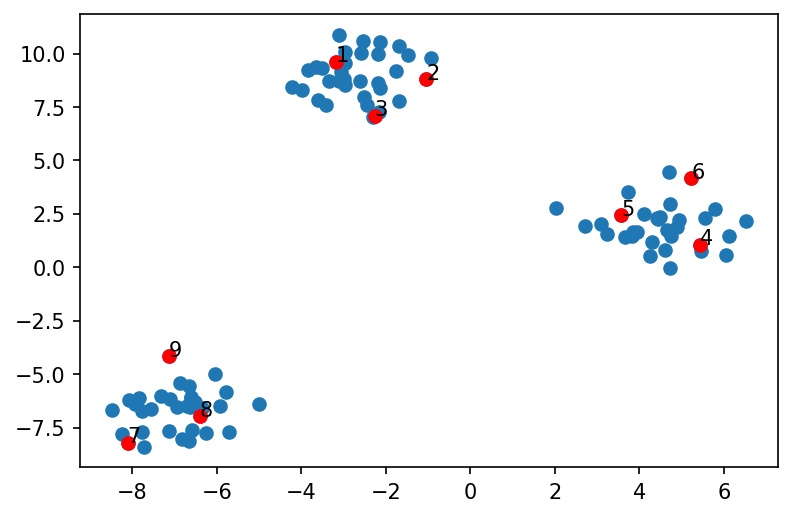

In [7]:
selected_id5 = DirectedSphereExclusion().select(coords, 15)
selected_id6 = DirectedSphereExclusion().select(coords_cluster, num_selected=9, labels=class_labels_cluster)
graph_data(coords,selected_id5)
graph_data(coords_cluster,selected_id6)

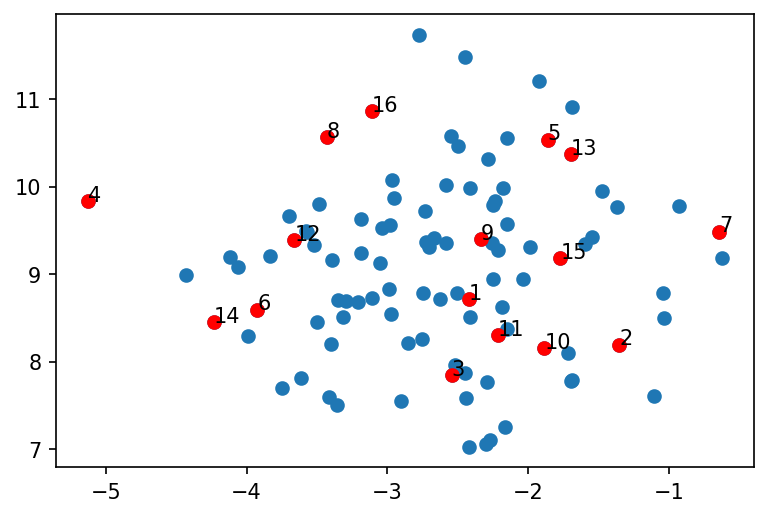

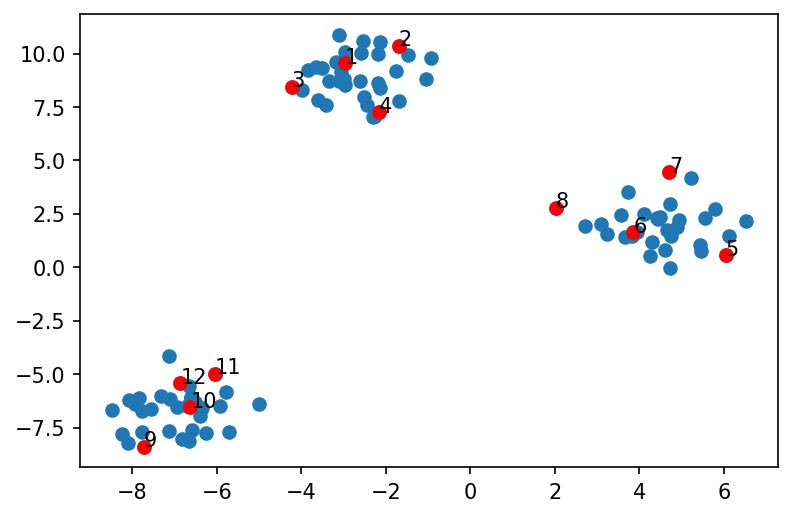

In [8]:
selected_id7 = GridPartitioning(3, "equisized_independent").select(coords, 10)
selected_id8 = GridPartitioning(2, "equisized_independent").select(coords_cluster, num_selected=9, labels=class_labels_cluster)
graph_data(coords,selected_id7)
graph_data(coords_cluster,selected_id8)
# 20, 5, 3, "equisized_independent"

### Brute Strength - maxsum

In [6]:
selector = DissimilaritySelection(num_selected=12,
                                  arr_dist=arr_dist,
                                  random_seed=42,
                                  method="maxsum")
selector.starting_idx = 0
selected_ids2 = selector.select()

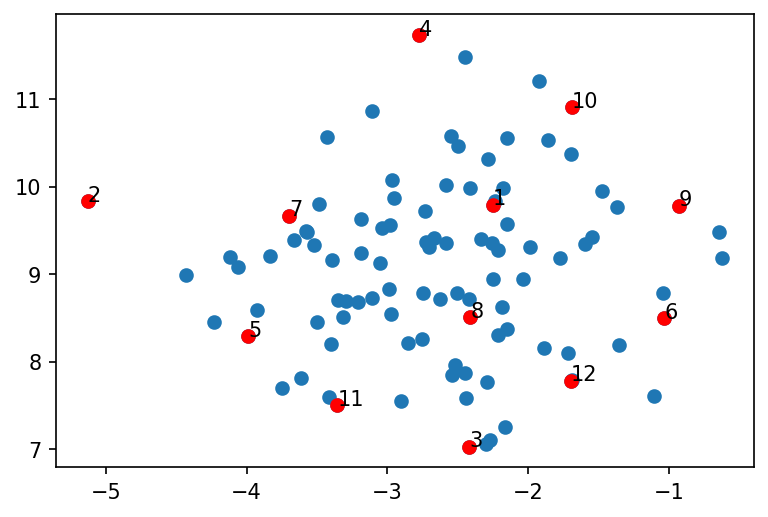

In [7]:
graph_data(selected_ids2)

### Grid Partitioning - Equisized Independent

In [8]:
selector = DissimilaritySelection(features=coords,
                                  num_selected=12,
                                  arr_dist=arr_dist,
                                  grid_method="grid_partioning",
                                  random_seed=42)
selector.starting_idx = 0
selected_ids3 = selector.select()

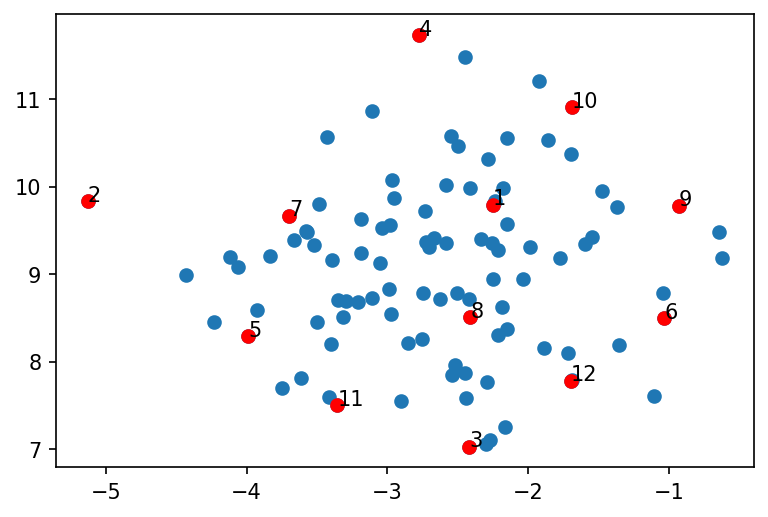

In [9]:
graph_data(selected_ids3)

### Grid Partitioning - Equisized Dependent

In [10]:
selector = DissimilaritySelection(num_selected=12,
                                  features = coords,
                                  random_seed=42,
                                  dissim_func="grid_partitioning",
                                  grid_method="equisized_dependent")
selector.starting_idx = 0
selected_ids4 = selector.select()

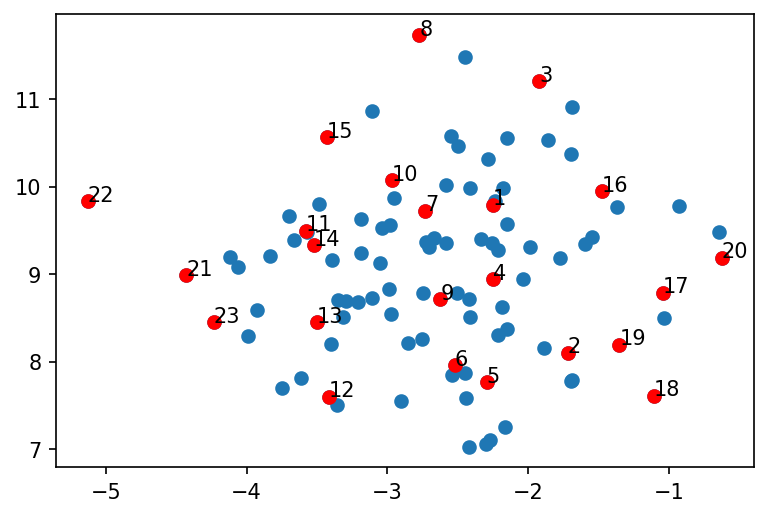

In [11]:
graph_data(selected_ids4)

### Directed Sphere Exclusion

In [12]:
selector = DissimilaritySelection(num_selected=12,
                                  features=coords,
                                  dissim_func="sphere_exclusion",
                                  random_seed=42)
selector.starting_idx = 0
selected_ids5 = selector.select()

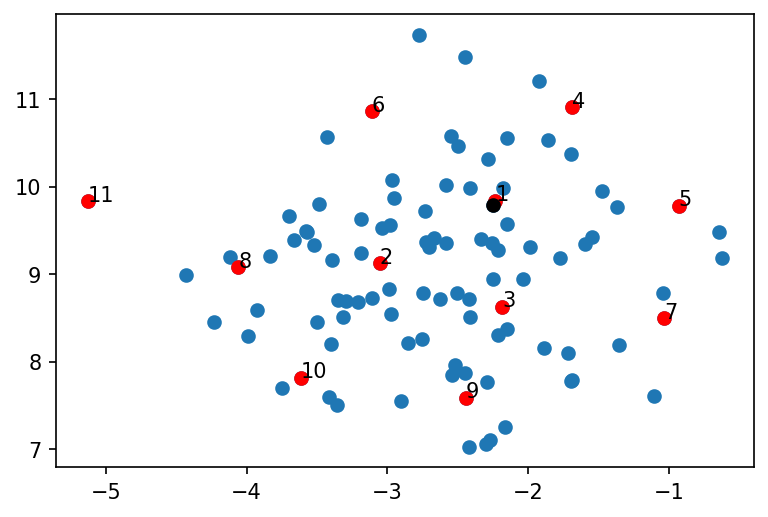

In [13]:
graph_data(selected_ids5, True)

### Optisim

In [14]:
selector = DissimilaritySelection(num_selected=12,
                                  features=coords,
                                  dissim_func="optisim",
                                  random_seed=42)
selector.starting_idx = 0
selected_ids6 = selector.select()

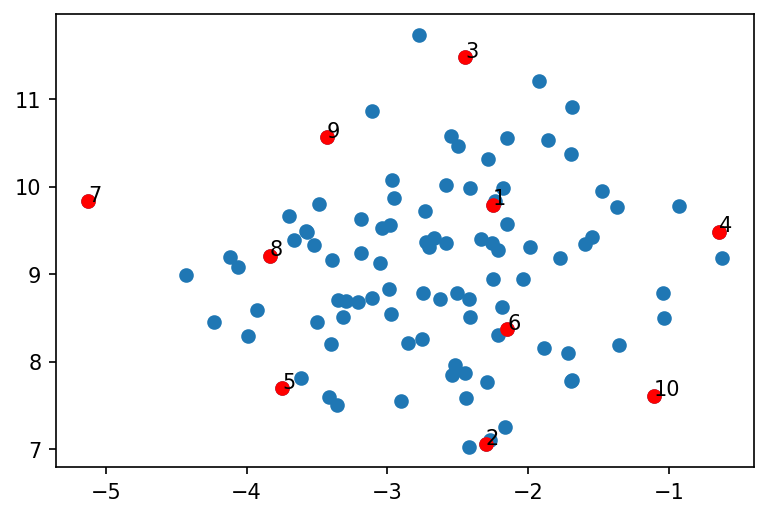

In [15]:
graph_data(selected_ids6)

# Demo - Dissimilarity Based Selection Real Example

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
# import cairosvg
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
# import rdkit
# from PIL import Image

def graph_mols(input_sdf="demo_mols_2d.sdf",
               selected_ids=None):
    IPythonConsole.drawOptions.legendFontSize = 18
    IPythonConsole.drawOptions.minFontSize = 16

    suppl = Chem.SDMolSupplier(input_sdf, removeHs=True)
    mols = [mol for mol in suppl]

    # selected mols
    if selected_ids is None:
        mols = np.array(mols)
    else:
        mols = np.array(mols)[selected_ids]

    label_list = [mol.GetProp("_Name").split(".")[0] for mol in mols]

    # img = Draw.MolsToGridImage(mols, legends=label_list, molsPerRow=5,
    #                            subImgSize=(250, 250), useSVG=False, returnPNG=True)

    # convert to 2D for drawing
    # smiles = [Chem.MolToSmiles(mol) for mol in mols]
    # mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    img = Draw.MolsToGridImage(mols,
                               legends=label_list,
                               molsPerRow=6,
                               subImgSize=(150, 150),
                               maxMols=999999,
                              )
    png = img.data

    # https://gist.github.com/greglandrum/56a80e84676fc3a24250b821d0faac13
    with open("chem_structures.png", "wb+") as f:
        f.write(png)

    # or
    # img
    # right click to save
    img = Draw.MolsToGridImage(mols,
                               legends=label_list,
                               molsPerRow=6,
                               subImgSize=(150, 150),
                               useSVG=True,
                               maxMols=999999,
                               )
    return img

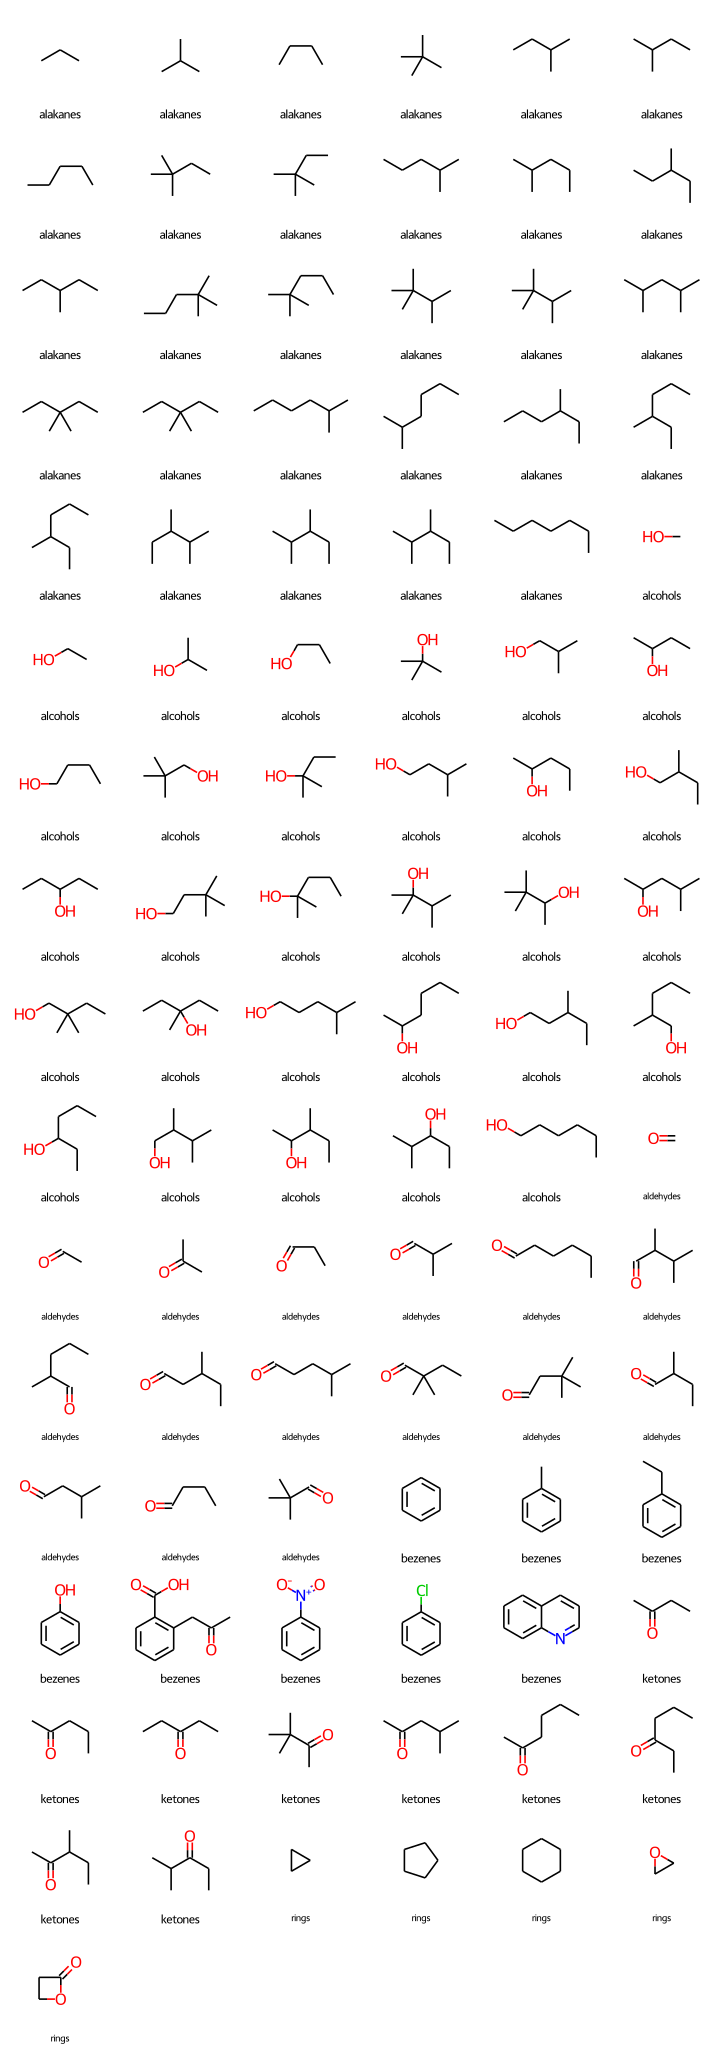

In [17]:
graph_mols()

In [18]:
# SCFP6 and brute strength, maxmin
from DiverseSelector.feature import compute_features

fingerprints_secfp6 = compute_features(mol_file="demo_mols_3d.sdf",
                                       feature_name = "SECFP",
                                       n_bits=2048,
                                       radius=3,
                                       min_radius=1,
                                       random_seed=12345,
                                       rings=True,
                                       isomeric=True,
                                       kekulize=True,
                                       use_fragment=True,
                                       ipc_avg=True,
                                       normalize_features=False,
                                       feature_output=None)

selector = DiverseSelector.DissimilaritySelection(num_selected=12,
                                                  features=fingerprints_secfp6,
                                                  brute_strength_type="maxmin",
                                                  dissim_func="brute_strength",
                                                  random_seed=42,
                                                  feature_type="fingerprint")
selected_ids7 = selector.select()
print(selected_ids7)

[82, 52, 79, 80, 64, 46, 87, 77, 78, 96, 44, 81]


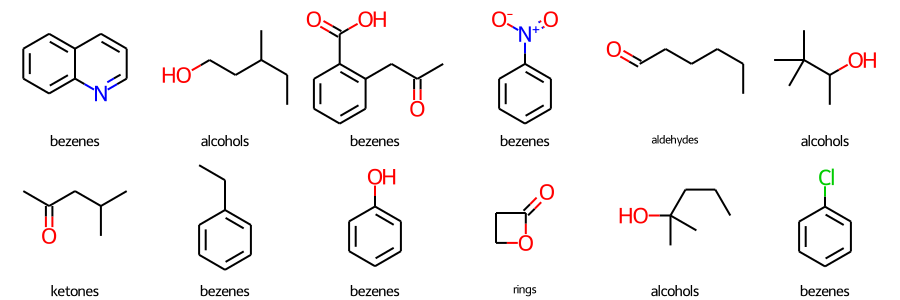

In [19]:
graph_mols(input_sdf="demo_mols_2d.sdf", selected_ids=selected_ids7)

In [20]:
# SCFP6 and brute strength, maxsum
selector = DiverseSelector.DissimilaritySelection(num_selected=12,
                                                  features=fingerprints_secfp6,
                                                  brute_strength_type="maxsum",
                                                  dissim_func="brute_strength",
                                                  random_seed=42,
                                                  feature_type="fingerprint")
selected_ids8 = selector.select()
print(selected_ids8)

[82, 52, 79, 66, 80, 51, 68, 78, 56, 48, 81, 53]


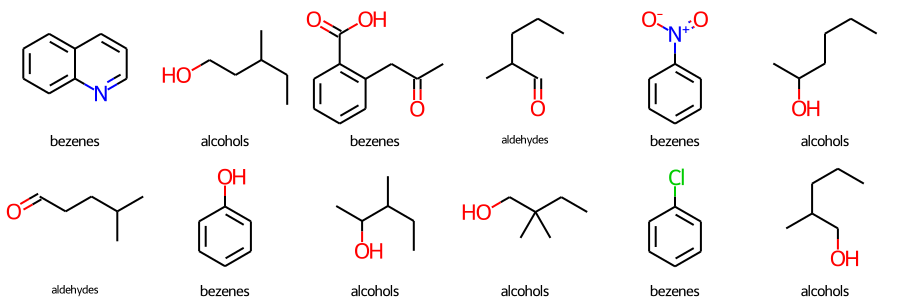

In [21]:
graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids8)

In [22]:
# SCFP6 and grid_partitioning, equisized_independent
selector = DiverseSelector.DissimilaritySelection(num_selected=12,
                                                  features=fingerprints_secfp6,
                                                  brute_strength_type="maxmin",
                                                  dissim_func="grid_partitioning",
                                                  grid_method="equisized_independent",
                                                  random_seed=42,
                                                  feature_type="fingerprint")
selected_ids9 = selector.select()
print(selected_ids9)

[3, 56, 77, 78, 79, 82, 90, 10, 76, 81, 80, 83, 22]


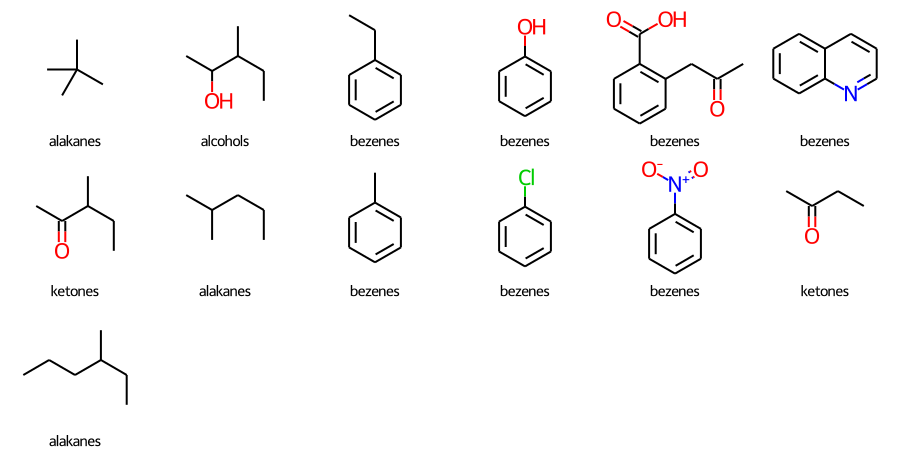

In [23]:
# problem:  more than 12 molecules?
graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids9)

In [24]:
# SCFP6 and grid_partitioning, equisized_dependent
# selector = DiverseSelector.DissimilaritySelection(num_selected=12,
#                                        mol_file="demo_mols.sdf",
#                                        random_seed=42,
#                                        feature_type="fingerprint",
#                                        grid_method="equisized_dependent")
selector = DiverseSelector.DissimilaritySelection(num_selected=12,
                                                  features=fingerprints_secfp6,
                                                  brute_strength_type="maxmin",
                                                  dissim_func="grid_partitioning",
                                                  grid_method="equisized_dependent",
                                                  random_seed=42,
                                                  feature_type="fingerprint")
selected_ids10 = selector.select()
print(selected_ids10)

[7, 90, 88, 78, 76, 80, 82, 6, 87, 75, 81, 77, 79]


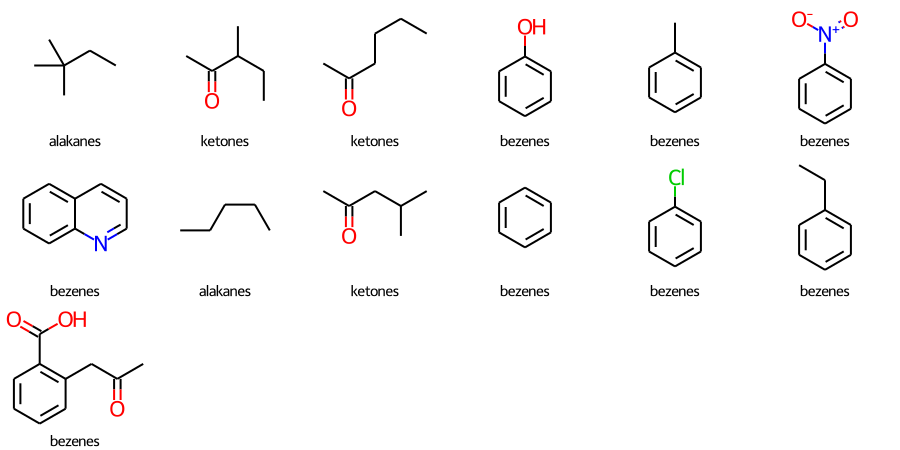

In [25]:
graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids10)

In [26]:
# SCFP6 and sphere exclusion
selector = DiverseSelector.DissimilaritySelection(num_selected=12,
                                                  dissim_func="sphere_exclusion",
                                                  features=fingerprints_secfp6,
                                                  random_seed=42,
                                                  feature_type="fingerprint")
selected_ids11 = selector.select()
print(selected_ids11)

[75, 76, 77, 29, 59, 92, 3, 93, 94, 0, 1, 95]


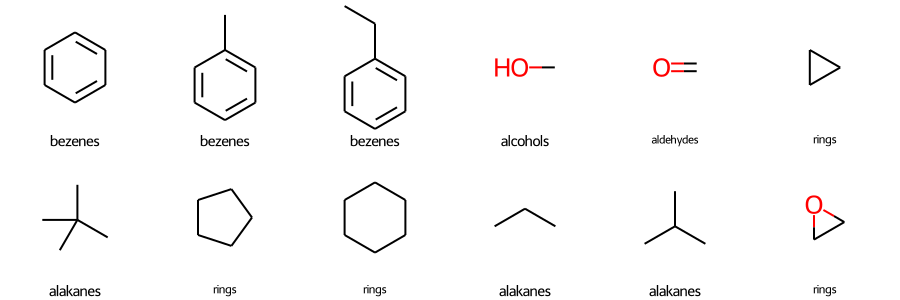

In [27]:
graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids11)

In [18]:
# SCFP6 and optimsim
selector = DiverseSelector.DissimilaritySelection(num_selected=12,
                                                  dissim_func="optisim",
                                                  features=fingerprints_secfp6,
                                                  random_seed=42,
                                                  feature_type="fingerprint")
selected_ids12 = selector.select()
print(selected_ids12)

NameError: name 'fingerprints_secfp6' is not defined

In [17]:
graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids12)

NameError: name 'selected_ids12' is not defined

# Clustering Based Selection

In [4]:
from DiverseSelector.clustering_based import ClusteringSelection

In [5]:
padel_descriptors = compute_features(mol_file="demo_mols_3d.sdf",
                                       feature_name = "padel",
                                       n_bits=2048,
                                       radius=3,
                                       min_radius=1,
                                       random_seed=12345,
                                       rings=True,
                                       isomeric=True,
                                       kekulize=True,
                                       use_fragment=True,
                                       ipc_avg=True,
                                       normalize_features=True,
                                       feature_output=None)
padel_descriptors


/Users/valeriichuiko/Desktop/DiverseSelector/DiverseSelector/feature.py:684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_valid.fillna(0, inplace=True)
/Users/valeriichuiko/Desktop/DiverseSelector/DiverseSelector/feature.py:688: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_valid.iloc[:, :] = StandardScaler().fit_transform(df_features_valid)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
Name,,,,,,,,,,,,,,,,,,,,,
alakanes.sdf,-0.107211,-0.450668,-0.795224,-1.955645,-2.203175,0.0,0.0,-1.979428,-2.548364,-1.294285,...,0.257698,-0.283376,0.909121,1.217253,1.452159,-1.905420,-1.967847,-1.951755,0.186633,1.757744
alakanes.sdf,-0.107211,-0.762355,-0.622350,-1.510541,-1.361641,0.0,0.0,-1.184041,-1.805795,-0.652611,...,-1.233719,2.023837,-0.324112,-0.159699,-1.139604,-1.378892,-1.358004,-1.382614,-0.617241,-0.880074
alakanes.sdf,-0.107211,0.113831,-0.723557,-0.676240,-0.520107,0.0,0.0,-0.388655,-1.063225,-0.010938,...,-1.964261,0.934085,-1.822231,-0.816146,0.400035,-0.996280,-0.769742,-0.753111,-2.149170,-0.780180
alakanes.sdf,-0.107211,0.113831,-0.723557,-0.676240,-0.520107,0.0,0.0,-0.388655,-1.063225,-0.010938,...,-1.970806,0.942979,-1.182653,-0.874504,0.135868,-1.000771,-0.775496,-0.759092,-2.151518,-0.737312
alakanes.sdf,-0.107211,-1.074041,-0.298329,-1.065438,-0.520107,0.0,0.0,-0.388655,-1.063225,-0.010938,...,-1.971508,0.939259,-1.240634,-0.021063,0.326094,-0.998140,-0.772119,-0.755581,-2.154870,-0.256917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ketones.sdf,-0.107211,0.352358,-0.544269,0.516533,0.176821,0.0,0.0,0.141603,0.421915,-0.010938,...,0.829836,-0.604995,0.661547,-0.924858,-0.159205,0.695256,0.543984,0.536119,0.788085,-0.277222
rings.sdf,-0.107211,-1.185080,-0.146382,-2.868936,-2.565944,0.0,0.0,-2.509685,-2.548364,-1.935959,...,-1.645248,1.430046,1.165206,1.128394,2.950179,-2.388456,-2.176247,-2.199226,-1.467060,2.718552
rings.sdf,-0.107211,-1.808453,1.062792,-1.978729,-0.882877,0.0,0.0,-0.918912,-1.063225,-0.652611,...,-1.309508,1.928762,0.570359,0.582993,0.108251,-1.348400,-1.302749,-1.321855,-0.763714,0.533924


In [6]:
# 4 cluster is not a good choice
selector = ClusteringSelection(features=padel_descriptors,
                               num_selected=12,
                               num_clusters=4,
                               clustering_method="k-means",
                               metric='euclidian',
                               )
selector.cluster()
selected_ids13 = selector.select()

/Users/valeriichuiko/Desktop/DiverseSelector/DiverseSelector/clustering_based.py:202: UserWarning: Number of molecules in one cluster is less than 12/4.
Number of selected molecules might be less than desired.
In order to avoid this problem. Try to use less number of clusters
  warnings.warn(f"Number of molecules in one cluster is less than"


In [6]:
selector.save_output(selected=selected_ids13, fname='hello.json', format='json')

In [9]:
graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids13)

NameError: name 'graph_mols' is not defined

In [7]:
# 3 clusters
selector = ClusteringSelection(features=padel_descriptors,
                               num_selected=12,
                               num_clusters=3,
                               clustering_method="k-means",
                               metric='euclidian',
                               )
selector.cluster()
selected_ids14 = selector.select()

graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids14)
# we get 12 molecules

NameError: name 'graph_mols' is not defined

In [8]:
# 3 clusters with fingerprints
selector = ClusteringSelection(features=fingerprints_secfp6,
                               num_selected=12,
                               num_clusters=3,
                               clustering_method="k-means",
                               metric='euclidian',
                               )
selector.cluster()
selected_ids15 = selector.select()

graph_mols(input_sdf="demo_mols_2d.sdf",selected_ids=selected_ids15)
# we get 12 molecules, but not aromatic rings

NameError: name 'fingerprints_secfp6' is not defined

## Computing diversity of selected molecules

In [16]:
selected_diversity_volume = selector.subset_diversity(selected_ids13, metric='diversity volume')
total_diversity_volume_mols = selector.all_diversity(metric='diversity volume')
print(f"total diversity volume: {np.round(total_diversity_volume_mols, 2)}")
print(f"selected diversity volume: {selected_diversity_volume}")

total diversity volume: 375717.56
selected diversity volume: 4500


## Finding outliers in the dataset

In [4]:
coords, class_labels, arr_dist = generate_synthetic_data(n_samples=100,
                                                         n_features=2,
                                                         n_clusters=1,
                                                         pairwise_dist=True,
                                                         metric="euclidean",
                                                         random_state=42)

